<a href="https://colab.research.google.com/github/bhardwajshivam/Optimizing-Order-Execution-Strategy-for-HFT/blob/main/Strategy_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('AAPLdata.csv')

In [2]:
data

,Date,Open,Close,short,lag1,lag2,lag3,lag4,lag5,s1,s2,s3,s4,s5
0,2013-08-08,16.566429,16.464643,1,16.606428,16.616072,16.766071,16.519285,16.309999,16.606428,8.308036,5.588690,4.129821,3.262000
1,2013-08-09,16.379999,16.230356,1,16.464643,16.606428,16.616072,16.766071,16.519285,16.464643,8.303214,5.538691,4.191518,3.303857
2,2013-08-12,16.316429,16.691429,0,16.230356,16.464643,16.606428,16.616072,16.766071,16.230356,8.232322,5.535476,4.154018,3.353214
3,2013-08-13,16.819286,17.484644,0,16.691429,16.230356,16.464643,16.606428,16.616072,16.691429,8.115178,5.488214,4.151607,3.323214
4,2013-08-14,17.781429,17.803572,0,17.484644,16.691429,16.230356,16.464643,16.606428,17.484644,8.345715,5.410119,4.116161,3.321286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2023-07-25,193.330002,193.619995,0,192.750000,191.940002,193.130005,195.100006,193.729996,192.750000,95.970001,64.376668,48.775002,38.745999
2507,2023-07-26,193.669998,194.500000,0,193.619995,192.750000,191.940002,193.130005,195.100006,193.619995,96.375000,63.980001,48.282501,39.020001
2508,2023-07-27,196.020004,193.220001,1,194.500000,193.619995,192.750000,191.940002,193.130005,194.500000,96.809998,64.250000,47.985001,38.626001
2509,2023-07-28,194.669998,195.830002,0,193.220001,194.500000,193.619995,192.750000,191.940002,193.220001,97.250000,64.539998,48.187500,38.388000


In [3]:
data.corr

<bound method DataFrame.corr of             Date        Open       Close  short        lag1        lag2  \
0     2013-08-08   16.566429   16.464643      1   16.606428   16.616072   
1     2013-08-09   16.379999   16.230356      1   16.464643   16.606428   
2     2013-08-12   16.316429   16.691429      0   16.230356   16.464643   
3     2013-08-13   16.819286   17.484644      0   16.691429   16.230356   
4     2013-08-14   17.781429   17.803572      0   17.484644   16.691429   
...          ...         ...         ...    ...         ...         ...   
2506  2023-07-25  193.330002  193.619995      0  192.750000  191.940002   
2507  2023-07-26  193.669998  194.500000      0  193.619995  192.750000   
2508  2023-07-27  196.020004  193.220001      1  194.500000  193.619995   
2509  2023-07-28  194.669998  195.830002      0  193.220001  194.500000   
2510  2023-07-31  196.059998  196.449997      0  195.830002  193.220001   

            lag3        lag4        lag5          s1         s2    

In [4]:
data['Date'][1]

'2013-08-09'

In [5]:
from datetime import datetime

def get_week_number(date_string):
    try:
        date_obj = datetime.strptime(date_string, '%Y-%m-%d')
        year, week_number, _ = date_obj.isocalendar()

        return year, week_number
    except ValueError:
        return None

date_string = '2013-08-09'
result = get_week_number(date_string)
if result:
    year, week_number = result
    print(f'Year: {year}, Week Number: {week_number}')
else:
    print('Invalid date format.')


Year: 2013, Week Number: 32


In [6]:
get_week_number(data['Date'][1])[1]

32

In [7]:
x = []
y = []
for i in range(len(data)):
    x.append(get_week_number(data['Date'][i])[1])
    y.append(get_week_number(data['Date'][i])[0])

In [8]:
x

[32,
 32,
 33,
 33,
 33,
 33,
 33,
 34,
 34,
 34,
 34,
 34,
 35,
 35,
 35,
 35,
 35,
 36,
 36,
 36,
 36,
 37,
 37,
 37,
 37,
 37,
 38,
 38,
 38,
 38,
 38,
 39,
 39,
 39,
 39,
 39,
 40,
 40,
 40,
 40,
 40,
 41,
 41,
 41,
 41,
 41,
 42,
 42,
 42,
 42,
 42,
 43,
 43,
 43,
 43,
 43,
 44,
 44,
 44,
 44,
 44,
 45,
 45,
 45,
 45,
 45,
 46,
 46,
 46,
 46,
 46,
 47,
 47,
 47,
 47,
 47,
 48,
 48,
 48,
 48,
 49,
 49,
 49,
 49,
 49,
 50,
 50,
 50,
 50,
 50,
 51,
 51,
 51,
 51,
 51,
 52,
 52,
 52,
 52,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 6,
 7,
 7,
 7,
 7,
 7,
 8,
 8,
 8,
 8,
 9,
 9,
 9,
 9,
 9,
 10,
 10,
 10,
 10,
 10,
 11,
 11,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 16,
 16,
 16,
 16,
 17,
 17,
 17,
 17,
 17,
 18,
 18,
 18,
 18,
 18,
 19,
 19,
 19,
 19,
 19,
 20,
 20,
 20,
 20,
 20,
 21,
 21,
 21,
 21,
 21,
 22,
 22,
 22,
 22,
 23,
 23,
 23,
 23,
 2

In [9]:
y

[2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2013,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,
 2014,

In [10]:
data['week'] = x
data['year'] = y
data

,Date,Open,Close,short,lag1,lag2,lag3,lag4,lag5,s1,s2,s3,s4,s5,week,year
0,2013-08-08,16.566429,16.464643,1,16.606428,16.616072,16.766071,16.519285,16.309999,16.606428,8.308036,5.588690,4.129821,3.262000,32,2013
1,2013-08-09,16.379999,16.230356,1,16.464643,16.606428,16.616072,16.766071,16.519285,16.464643,8.303214,5.538691,4.191518,3.303857,32,2013
2,2013-08-12,16.316429,16.691429,0,16.230356,16.464643,16.606428,16.616072,16.766071,16.230356,8.232322,5.535476,4.154018,3.353214,33,2013
3,2013-08-13,16.819286,17.484644,0,16.691429,16.230356,16.464643,16.606428,16.616072,16.691429,8.115178,5.488214,4.151607,3.323214,33,2013
4,2013-08-14,17.781429,17.803572,0,17.484644,16.691429,16.230356,16.464643,16.606428,17.484644,8.345715,5.410119,4.116161,3.321286,33,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2506,2023-07-25,193.330002,193.619995,0,192.750000,191.940002,193.130005,195.100006,193.729996,192.750000,95.970001,64.376668,48.775002,38.745999,30,2023
2507,2023-07-26,193.669998,194.500000,0,193.619995,192.750000,191.940002,193.130005,195.100006,193.619995,96.375000,63.980001,48.282501,39.020001,30,2023
2508,2023-07-27,196.020004,193.220001,1,194.500000,193.619995,192.750000,191.940002,193.130005,194.500000,96.809998,64.250000,47.985001,38.626001,30,2023
2509,2023-07-28,194.669998,195.830002,0,193.220001,194.500000,193.619995,192.750000,191.940002,193.220001,97.250000,64.539998,48.187500,38.388000,30,2023


In [11]:
data[['Open', 'Close', 'week', 'year']].corr()

,Open,Close,week,year
Open,1.000000,0.999671,-0.027588,0.904572
Close,0.999671,1.000000,-0.028033,0.904834
week,-0.027588,-0.028033,1.000000,-0.144777
year,0.904572,0.904834,-0.144777,1.000000


In [12]:
d1 = data[['Open', 'Close', 'week', 'year']].groupby(['year','week'])
d1.first()

Open       Close
year week                        
2013 32     16.566429   16.464643
     33     16.316429   16.691429
     34     18.012142   18.133572
     35     17.883928   17.963215
     36     17.610714   17.449286
...               ...         ...
2023 27    193.779999  192.460007
     28    189.259995  188.610001
     29    191.899994  193.990005
     30    193.410004  192.750000
     31    196.059998  196.449997

[522 rows x 2 columns]

In [13]:
d1.get_group((2022, 2))['Close'].median()

173.07000732421875

In [14]:
df = data[['Open', 'Close', 'week', 'year']]
mean_closed = []
median_closed = []

for i in range(len(data)):
    cur_year = data['year'][i]
    cur_week = data['week'][i]
    s = d1.get_group((cur_year, cur_week))
    mean_closed.append(s['Close'].mean())
    median_closed.append(s['Close'].median())



In [15]:
df['mean_closed'] = mean_closed
df['median_closed'] = median_closed

<ipython-input-15-313705de4db8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mean_closed'] = mean_closed
<ipython-input-15-313705de4db8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['median_closed'] = median_closed


In [16]:
df

,Open,Close,week,year,mean_closed,median_closed
0,16.566429,16.464643,32,2013,16.347500,16.347500
1,16.379999,16.230356,32,2013,16.347500,16.347500
2,16.316429,16.691429,33,2013,17.540500,17.782499
3,16.819286,17.484644,33,2013,17.540500,17.782499
4,17.781429,17.803572,33,2013,17.540500,17.782499
...,...,...,...,...,...,...
2506,193.330002,193.619995,30,2023,193.984000,193.619995
2507,193.669998,194.500000,30,2023,193.984000,193.619995
2508,196.020004,193.220001,30,2023,193.984000,193.619995
2509,194.669998,195.830002,30,2023,193.984000,193.619995


In [17]:
df.corr()

,Open,Close,week,year,mean_closed,median_closed
Open,1.000000,0.999671,-0.027588,0.904572,0.999609,0.999572
Close,0.999671,1.000000,-0.028033,0.904834,0.999634,0.999586
week,-0.027588,-0.028033,1.000000,-0.144777,-0.028044,-0.027187
year,0.904572,0.904834,-0.144777,1.000000,0.905165,0.905195
mean_closed,0.999609,0.999634,-0.028044,0.905165,1.000000,0.999951
median_closed,0.999572,0.999586,-0.027187,0.905195,0.999951,1.000000


In [18]:
df['close_lag1'] = df['Close'].shift(periods = -1)
df

<ipython-input-18-d5acdaba49f6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_lag1'] = df['Close'].shift(periods = -1)


,Open,Close,week,year,mean_closed,median_closed,close_lag1
0,16.566429,16.464643,32,2013,16.347500,16.347500,16.230356
1,16.379999,16.230356,32,2013,16.347500,16.347500,16.691429
2,16.316429,16.691429,33,2013,17.540500,17.782499,17.484644
3,16.819286,17.484644,33,2013,17.540500,17.782499,17.803572
4,17.781429,17.803572,33,2013,17.540500,17.782499,17.782499
...,...,...,...,...,...,...,...
2506,193.330002,193.619995,30,2023,193.984000,193.619995,194.500000
2507,193.669998,194.500000,30,2023,193.984000,193.619995,193.220001
2508,196.020004,193.220001,30,2023,193.984000,193.619995,195.830002
2509,194.669998,195.830002,30,2023,193.984000,193.619995,196.449997


In [19]:
df.corr()

,Open,Close,week,year,mean_closed,median_closed,close_lag1
Open,1.000000,0.999671,-0.027588,0.904572,0.999609,0.999572,0.999178
Close,0.999671,1.000000,-0.028033,0.904834,0.999634,0.999586,0.999501
week,-0.027588,-0.028033,1.000000,-0.144777,-0.028044,-0.027187,-0.028319
year,0.904572,0.904834,-0.144777,1.000000,0.905165,0.905195,0.904862
mean_closed,0.999609,0.999634,-0.028044,0.905165,1.000000,0.999951,0.999477
median_closed,0.999572,0.999586,-0.027187,0.905195,0.999951,1.000000,0.999412
close_lag1,0.999178,0.999501,-0.028319,0.904862,0.999477,0.999412,1.000000


In [20]:
def calculate_log_returns(closing_prices):
    """Calculate log returns based on daily closing prices."""
    log_returns = np.log(closing_prices / closing_prices.shift(1))
    return log_returns

def calculate_simple_moving_average(closing_prices, window=7):
    """Calculate simple moving average based on daily closing prices."""
    sma = closing_prices.rolling(window=window).mean()
    return sma

def calculate_momentum(closing_prices, window=7):
    """Calculate momentum based on daily closing prices."""
    momentum = closing_prices.pct_change().rolling(window=window).sum()
    return momentum

def calculate_volatility(closing_prices, window=7):
    """Calculate volatility based on daily closing prices."""
    volatility = closing_prices.pct_change().rolling(window=window).std()
    return volatility

def calculate_direction(closing_prices):
    """Calculate direction based on daily closing prices."""
    direction = np.where(closing_prices.diff() > 0, 1, -1)
    return direction


# Calculate log returns
df['log_returns'] = calculate_log_returns(df['Close'])

# Calculate simple moving average with a window of 7 days
df['sma'] = calculate_simple_moving_average(df['Close'], window=7)

# Calculate momentum with a window of 7 days
df['momentum'] = calculate_momentum(df['Close'], window=7)

# Calculate volatility with a window of 7 days
df['volatility'] = calculate_volatility(df['Close'], window=7)

# Calculate direction
df['direction'] = calculate_direction(df['Close'])


<ipython-input-20-d5232ed7d241>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_returns'] = calculate_log_returns(df['Close'])
<ipython-input-20-d5232ed7d241>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sma'] = calculate_simple_moving_average(df['Close'], window=7)
<ipython-input-20-d5232ed7d241>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

In [21]:
df

,Open,Close,week,year,mean_closed,median_closed,close_lag1,log_returns,sma,momentum,volatility,direction
0,16.566429,16.464643,32,2013,16.347500,16.347500,16.230356,NaN,NaN,NaN,NaN,-1
1,16.379999,16.230356,32,2013,16.347500,16.347500,16.691429,-0.014332,NaN,NaN,NaN,-1
2,16.316429,16.691429,33,2013,17.540500,17.782499,17.484644,0.028012,NaN,NaN,NaN,1
3,16.819286,17.484644,33,2013,17.540500,17.782499,17.803572,0.046428,NaN,NaN,NaN,1
4,17.781429,17.803572,33,2013,17.540500,17.782499,17.782499,0.018076,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2506,193.330002,193.619995,30,2023,193.984000,193.619995,194.500000,0.004503,193.465716,0.015512,0.009083,1
2507,193.669998,194.500000,30,2023,193.984000,193.619995,193.220001,0.004535,193.538572,0.002751,0.006448,1
2508,196.020004,193.220001,30,2023,193.984000,193.619995,195.830002,-0.006603,193.465716,-0.002490,0.006967,-1
2509,194.669998,195.830002,30,2023,193.984000,193.619995,196.449997,0.013418,193.570001,0.003947,0.008390,1


In [22]:
df.dropna(inplace = True)
df

<ipython-input-22-1a016f44adc8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace = True)


,Open,Close,week,year,mean_closed,median_closed,close_lag1,log_returns,sma,momentum,volatility,direction
7,18.012142,18.133572,34,2013,17.965357,17.941429,17.895357,0.010712,17.438061,0.098404,0.020056,1
8,18.203930,17.895357,34,2013,17.965357,17.941429,17.941429,-0.013224,17.675919,0.099497,0.019802,-1
9,17.985357,17.941429,34,2013,17.965357,17.941429,17.962856,0.002571,17.854490,0.073664,0.019111,1
10,18.035000,17.962856,34,2013,17.965357,17.941429,17.893572,0.001194,17.922806,0.027336,0.010023,1
11,17.973928,17.893572,34,2013,17.965357,17.941429,17.963215,-0.003865,17.935663,0.005238,0.008039,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2505,193.410004,192.750000,30,2023,193.984000,193.619995,193.619995,0.004211,193.047145,0.011785,0.009035,1
2506,193.330002,193.619995,30,2023,193.984000,193.619995,194.500000,0.004503,193.465716,0.015512,0.009083,1
2507,193.669998,194.500000,30,2023,193.984000,193.619995,193.220001,0.004535,193.538572,0.002751,0.006448,1
2508,196.020004,193.220001,30,2023,193.984000,193.619995,195.830002,-0.006603,193.465716,-0.002490,0.006967,-1


In [23]:
df.corr()

,Open,Close,week,year,mean_closed,median_closed,close_lag1,log_returns,sma,momentum,volatility,direction
Open,1.000000,0.999670,-0.026782,0.904704,0.999607,0.999570,0.999176,0.000036,0.999380,0.035277,0.168171,-0.010301
Close,0.999670,1.000000,-0.027231,0.904975,0.999633,0.999584,0.999500,0.016647,0.999191,0.041531,0.167878,0.002333
week,-0.026782,-0.027231,1.000000,-0.143723,-0.027242,-0.026386,-0.027215,-0.004753,-0.027694,-0.009482,-0.045567,-0.025186
year,0.904704,0.904975,-0.143723,1.000000,0.905307,0.905344,0.905082,0.007462,0.905155,0.021821,0.225737,0.005557
mean_closed,0.999607,0.999633,-0.027242,0.905307,1.000000,0.999951,0.999475,0.004682,0.999412,0.033959,0.167867,-0.005679
median_closed,0.999570,0.999584,-0.026386,0.905344,0.999951,1.000000,0.999410,0.004195,0.999359,0.034144,0.168324,-0.005914
close_lag1,0.999176,0.999500,-0.027215,0.905082,0.999475,0.999410,1.000000,0.014726,0.998768,0.040969,0.166707,0.001682
log_returns,0.000036,0.016647,-0.004753,0.007462,0.004682,0.004195,0.014726,1.000000,-0.004577,0.365892,-0.011512,0.695888
sma,0.999380,0.999191,-0.027694,0.905155,0.999412,0.999359,0.998768,-0.004577,1.000000,0.013963,0.171709,-0.012051
momentum,0.035277,0.041531,-0.009482,0.021821,0.033959,0.034144,0.040969,0.365892,0.013963,1.000000,-0.150842,0.273579


In [24]:
# our target value is close_lag1, i.e given the data till ith day, the closing price of (i+1)th day

In [25]:
# lets first try predicting the next direction (whether the value goes up or down)

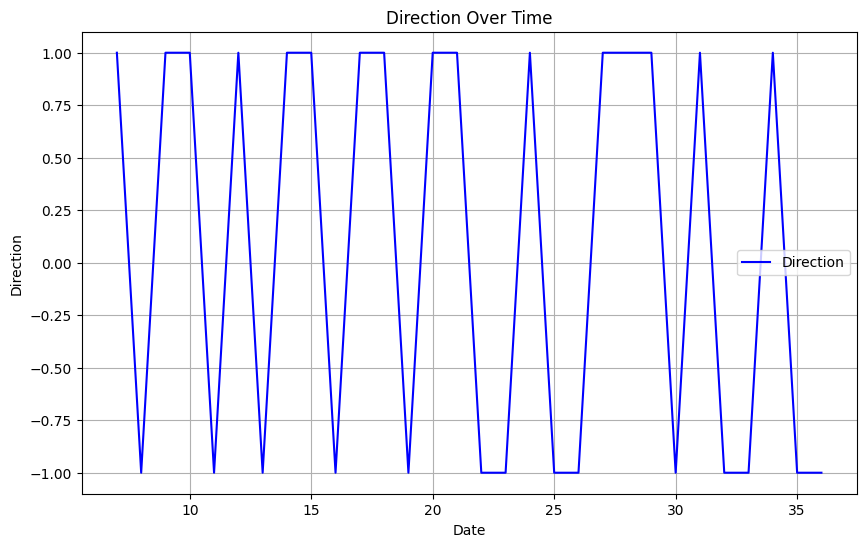

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(df['direction'][:30], label='Direction', color='blue')
plt.title('Direction Over Time')
plt.xlabel('Date')
plt.ylabel('Direction')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# Assuming 'df' is your DataFrame
df = df.reset_index(drop=True)
df

,Open,Close,week,year,mean_closed,median_closed,close_lag1,log_returns,sma,momentum,volatility,direction
0,18.012142,18.133572,34,2013,17.965357,17.941429,17.895357,0.010712,17.438061,0.098404,0.020056,1
1,18.203930,17.895357,34,2013,17.965357,17.941429,17.941429,-0.013224,17.675919,0.099497,0.019802,-1
2,17.985357,17.941429,34,2013,17.965357,17.941429,17.962856,0.002571,17.854490,0.073664,0.019111,1
3,18.035000,17.962856,34,2013,17.965357,17.941429,17.893572,0.001194,17.922806,0.027336,0.010023,1
4,17.973928,17.893572,34,2013,17.965357,17.941429,17.963215,-0.003865,17.935663,0.005238,0.008039,-1
...,...,...,...,...,...,...,...,...,...,...,...,...
2498,193.410004,192.750000,30,2023,193.984000,193.619995,193.619995,0.004211,193.047145,0.011785,0.009035,1
2499,193.330002,193.619995,30,2023,193.984000,193.619995,194.500000,0.004503,193.465716,0.015512,0.009083,1
2500,193.669998,194.500000,30,2023,193.984000,193.619995,193.220001,0.004535,193.538572,0.002751,0.006448,1
2501,196.020004,193.220001,30,2023,193.984000,193.619995,195.830002,-0.006603,193.465716,-0.002490,0.006967,-1


In [28]:
# Create a lag column for the 'direction' column
df['direction_lag'] = df['direction'].shift(-1)

# Drop the last row as it will have NaN in the 'direction_lag' column
df = df.dropna()
df = df.reset_index(drop=True)
# Print the updated DataFrame
print(df)

            Open       Close  week  year  mean_closed  median_closed  \
0      18.012142   18.133572    34  2013    17.965357      17.941429   
1      18.203930   17.895357    34  2013    17.965357      17.941429   
2      17.985357   17.941429    34  2013    17.965357      17.941429   
3      18.035000   17.962856    34  2013    17.965357      17.941429   
4      17.973928   17.893572    34  2013    17.965357      17.941429   
...          ...         ...   ...   ...          ...            ...   
2497  194.100006  191.940002    29  2023   193.578003     193.729996   
2498  193.410004  192.750000    30  2023   193.984000     193.619995   
2499  193.330002  193.619995    30  2023   193.984000     193.619995   
2500  193.669998  194.500000    30  2023   193.984000     193.619995   
2501  196.020004  193.220001    30  2023   193.984000     193.619995   

      close_lag1  log_returns         sma  momentum  volatility  direction  \
0      17.895357     0.010712   17.438061  0.098404    0.

In [29]:
df

,Open,Close,week,year,mean_closed,median_closed,close_lag1,log_returns,sma,momentum,volatility,direction,direction_lag
0,18.012142,18.133572,34,2013,17.965357,17.941429,17.895357,0.010712,17.438061,0.098404,0.020056,1,-1.0
1,18.203930,17.895357,34,2013,17.965357,17.941429,17.941429,-0.013224,17.675919,0.099497,0.019802,-1,1.0
2,17.985357,17.941429,34,2013,17.965357,17.941429,17.962856,0.002571,17.854490,0.073664,0.019111,1,1.0
3,18.035000,17.962856,34,2013,17.965357,17.941429,17.893572,0.001194,17.922806,0.027336,0.010023,1,-1.0
4,17.973928,17.893572,34,2013,17.965357,17.941429,17.963215,-0.003865,17.935663,0.005238,0.008039,-1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2497,194.100006,191.940002,29,2023,193.578003,193.729996,192.750000,-0.006181,192.731430,0.011623,0.009028,-1,1.0
2498,193.410004,192.750000,30,2023,193.984000,193.619995,193.619995,0.004211,193.047145,0.011785,0.009035,1,1.0
2499,193.330002,193.619995,30,2023,193.984000,193.619995,194.500000,0.004503,193.465716,0.015512,0.009083,1,1.0
2500,193.669998,194.500000,30,2023,193.984000,193.619995,193.220001,0.004535,193.538572,0.002751,0.006448,1,-1.0


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Features (X) and target variable (y)
X = df.drop('direction_lag', axis=1)
y = df['direction_lag']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, dt_predictions))
print("Classification Report:")
print(classification_report(y_test, dt_predictions))

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print("\nRandom Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, rf_predictions))
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)
print("\nGradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, gb_predictions))
print("Classification Report:")
print(classification_report(y_test, gb_predictions))

# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))
print("Classification Report:")
print(classification_report(y_test, lr_predictions))

# Support Vector Machine (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
print("\nSVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, svm_predictions))
print("Classification Report:")
print(classification_report(y_test, svm_predictions))


Decision Tree Accuracy: 0.6746506986027944
Confusion Matrix:
[[156  80]
 [ 83 182]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.65      0.66      0.66       236
         1.0       0.69      0.69      0.69       265

    accuracy                           0.67       501
   macro avg       0.67      0.67      0.67       501
weighted avg       0.67      0.67      0.67       501


Random Forest Accuracy: 0.6147704590818364
Confusion Matrix:
[[128 108]
 [ 85 180]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.60      0.54      0.57       236
         1.0       0.62      0.68      0.65       265

    accuracy                           0.61       501
   macro avg       0.61      0.61      0.61       501
weighted avg       0.61      0.61      0.61       501


Gradient Boosting Accuracy: 0.656686626746507
Confusion Matrix:
[[116 120]
 [ 52 213]]
Classification Report:
              precis

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



SVM Accuracy: 0.5289421157684631
Confusion Matrix:
[[  0 236]
 [  0 265]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00       236
         1.0       0.53      1.00      0.69       265

    accuracy                           0.53       501
   macro avg       0.26      0.50      0.35       501
weighted avg       0.28      0.53      0.37       501



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
# Logistic Regression
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print("\nLogistic Regression Accuracy:", accuracy_score(y_test, lr_predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, lr_predictions))
print("Classification Report:")
print(classification_report(y_test, lr_predictions))



Logistic Regression Accuracy: 0.9500998003992016
Confusion Matrix:
[[229   7]
 [ 18 247]]
Classification Report:
              precision    recall  f1-score   support

        -1.0       0.93      0.97      0.95       236
         1.0       0.97      0.93      0.95       265

    accuracy                           0.95       501
   macro avg       0.95      0.95      0.95       501
weighted avg       0.95      0.95      0.95       501



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [32]:
y_test

582     1.0
679    -1.0
2381    1.0
1660   -1.0
1351    1.0
       ... 
1303    1.0
1742    1.0
2497    1.0
1572    1.0
299    -1.0
Name: direction_lag, Length: 501, dtype: float64

In [33]:
lr_predictions

array([ 1.,  1.,  1., -1., -1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,
        1., -1., -1., -1., -1.,  1.,  1., -1., -1., -1.,  1., -1.,  1.,
       -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., -1.,
       -1.,  1., -1., -1.,  1.,  1.,  1.,  1., -1., -1.,  1., -1.,  1.,
       -1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1., -1.,  1.,  1.,  1.,
       -1., -1., -1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,  1.,  1.,
        1., -1., -1., -1.,  1.,  1.,  1., -1., -1.,  1., -1., -1., -1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1.,  1.,  1., -1., -1.,  1.,
        1., -1.,  1., -1.,  1.,  1., -1.,  1., -1.,  1., -1.,  1.,  1.,
       -1., -1.,  1., -1.,  1., -1., -1., -1., -1.,  1.,  1.,  1., -1.,
       -1., -1.,  1.,  1., -1.,  1.,  1.,  1., -1.,  1., -1.,  1.,  1.,
       -1.,  1., -1., -1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,
        1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,  1., -1.,  1.,
       -1., -1.,  1., -1.,  1.,  1., -1.,  1., -1., -1., -1.,  1

In [34]:
#lets look at the weeks where the predictions were made incorrect

incorrect_indices = y_test.index[y_test != lr_predictions].tolist()

print("Incorrect Predictions Indices:", incorrect_indices)


Incorrect Predictions Indices: [679, 1351, 1814, 2474, 781, 1565, 1845, 911, 246, 2001, 175, 1213, 1375, 522, 1809, 2081, 866, 2258, 2370, 1891, 1349, 1510, 839, 123, 1742]


In [35]:
incorrect_week_values = df.loc[incorrect_indices, 'week']

print("Values of 'week' for Incorrect Predictions:")
print(incorrect_week_values)


Values of 'week' for Incorrect Predictions:
679     17
1351     1
1814    44
2474    24
781     38
1565    45
1845    51
911     13
246     33
2001    30
175     18
1213    24
1375     6
522     38
1809    43
2081    47
866      4
2258    32
2370     3
1891     8
1349    52
1510    34
839     50
123      7
1742    30
Name: week, dtype: int64


In [36]:
incorrect_year_values = df.loc[incorrect_indices, 'year']

print("Values of 'year' for Incorrect Predictions:")
print(incorrect_year_values)

Values of 'year' for Incorrect Predictions:
679     2016
1351    2019
1814    2020
2474    2023
781     2016
1565    2019
1845    2020
911     2017
246     2014
2001    2021
175     2014
1213    2018
1375    2019
522     2015
1809    2020
2081    2021
866     2017
2258    2022
2370    2023
1891    2021
1349    2018
1510    2019
839     2016
123     2014
1742    2020
Name: year, dtype: int64


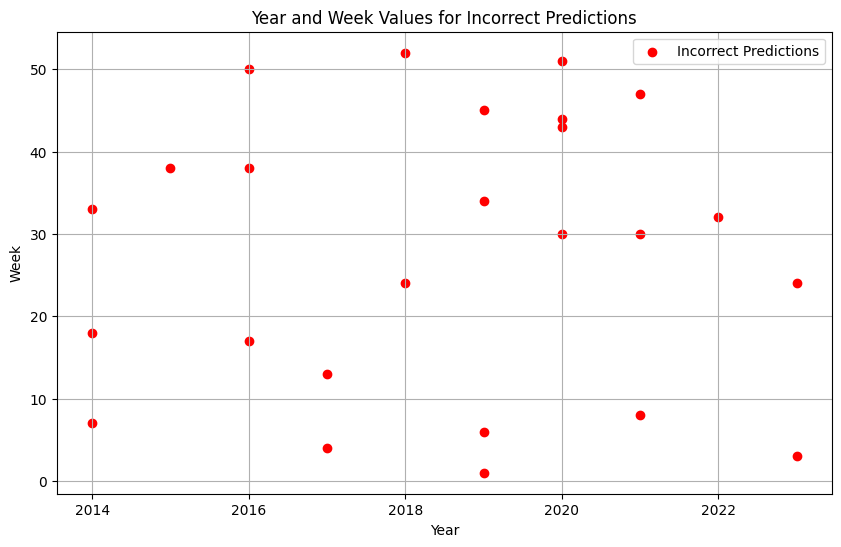

In [37]:

incorrect_df = df.loc[incorrect_indices, ['year', 'week']]

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(incorrect_df['year'], incorrect_df['week'], color='red', label='Incorrect Predictions')
plt.title('Year and Week Values for Incorrect Predictions')
plt.xlabel('Year')
plt.ylabel('Week')
plt.legend()
plt.grid(True)
plt.show()
